Objective:
      Predict house price by usnig given features.   

Pipeline:
 1. Import required Libraries.
 2. Import data
 3. Divide data by based on data type.
 4. Feature Engineering
     a.Handle Outliers and Missing values.
     b.Select features or Create new features by using co-relation.
 5. Combine divided data.
 6. Split data into Train&Test.
 7. Choose Model and test accuracy.
 

1. Import required Libraries.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv
/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings; warnings.simplefilter('ignore')

pd.set_option('display.max_rows',5000)
pd.set_option('display.max_columns',5000)


In [3]:
train = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')

In [4]:
df=train.copy()

In [5]:
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

2.divide data into categorical, numerical continous, numerical descrete,year

In [6]:
# List of variables that contain year information
year_feature = [feature for feature in df if 'Yr' in feature or 'Year' in feature]

year_feature

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [7]:
continous_feature = [feature for feature in df if len(df[feature].unique()) > 80 and feature not in year_feature + ['Id']]

print('Number of train continous feature : ',len(continous_feature))  
continous_feature

Number of train continous feature :  15


['LotFrontage',
 'LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'SalePrice']

In [8]:
train_continous_feature = df[continous_feature]
train_continous_feature.head()

LotFrontage  LotArea  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
0         65.0     8450       196.0         706           0        150   
1         80.0     9600         0.0         978           0        284   
2         68.0    11250       162.0         486           0        434   
3         60.0     9550         0.0         216           0        540   
4         84.0    14260       350.0         655           0        490   

   TotalBsmtSF  1stFlrSF  2ndFlrSF  GrLivArea  GarageArea  WoodDeckSF  \
0          856       856       854       1710         548           0   
1         1262      1262         0       1262         460         298   
2          920       920       866       1786         608           0   
3          756       961       756       1717         642           0   
4         1145      1145      1053       2198         836         192   

   OpenPorchSF  EnclosedPorch  SalePrice  
0           61              0     208500  
1            0              0     181500  
2           42              0     223500  
3           35            272     140000  
4           84              0     250000

In [9]:
train_categorical_features = df.select_dtypes(exclude=[np.number])
train_categorical_features.head()

MSZoning Street Alley LotShape LandContour Utilities LotConfig LandSlope  \
0       RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
1       RL   Pave   NaN      Reg         Lvl    AllPub       FR2       Gtl   
2       RL   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl   
3       RL   Pave   NaN      IR1         Lvl    AllPub    Corner       Gtl   
4       RL   Pave   NaN      IR1         Lvl    AllPub       FR2       Gtl   

  Neighborhood Condition1 Condition2 BldgType HouseStyle RoofStyle RoofMatl  \
0      CollgCr       Norm       Norm     1Fam     2Story     Gable  CompShg   
1      Veenker      Feedr       Norm     1Fam     1Story     Gable  CompShg   
2      CollgCr       Norm       Norm     1Fam     2Story     Gable  CompShg   
3      Crawfor       Norm       Norm     1Fam     2Story     Gable  CompShg   
4      NoRidge       Norm       Norm     1Fam     2Story     Gable  CompShg   

  Exterior1st Exterior2nd MasVnrType ExterQual ExterCond Foundation BsmtQual  \
0     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd   
1     MetalSd     MetalSd       None        TA        TA     CBlock       Gd   
2     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd   
3     Wd Sdng     Wd Shng       None        TA        TA     BrkTil       TA   
4     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd   

  BsmtCond BsmtExposure BsmtFinType1 BsmtFinType2 Heating HeatingQC  \
0       TA           No          GLQ          Unf    GasA        Ex   
1       TA           Gd          ALQ          Unf    GasA        Ex   
2       TA           Mn          GLQ          Unf    GasA        Ex   
3       Gd           No          ALQ          Unf    GasA        Gd   
4       TA           Av          GLQ          Unf    GasA        Ex   

  CentralAir Electrical KitchenQual Functional FireplaceQu GarageType  \
0          Y      SBrkr          Gd        Typ         NaN     Attchd   
1          Y      SBrkr          TA        Typ          TA     Attchd   
2          Y      SBrkr          Gd        Typ          TA     Attchd   
3          Y      SBrkr          Gd        Typ          Gd     Detchd   
4          Y      SBrkr          Gd        Typ          TA     Attchd   

  GarageFinish GarageQual GarageCond PavedDrive PoolQC Fence MiscFeature  \
0          RFn         TA         TA          Y    NaN   NaN         NaN   
1          RFn         TA         TA          Y    NaN   NaN         NaN   
2          RFn         TA         TA          Y    NaN   NaN         NaN   
3          Unf         TA         TA          Y    NaN   NaN         NaN   
4          RFn         TA         TA          Y    NaN   NaN         NaN   

  SaleType SaleCondition  
0       WD        Normal  
1       WD        Normal  
2       WD        Normal  
3       WD       Abnorml  
4       WD        Normal

In [10]:
train_year_feature = df[year_feature]
train_year_feature.head()

YearBuilt  YearRemodAdd  GarageYrBlt  YrSold
0       2003          2003       2003.0    2008
1       1976          1976       1976.0    2007
2       2001          2002       2001.0    2008
3       1915          1970       1998.0    2006
4       2000          2000       2000.0    2008

In [11]:
df_numerical_features = df.select_dtypes(include=[np.number])
# Numerical variables are usually of 2 type
# 1. Continous variable and Discrete Variables

discrete_feature = [feature for feature in df_numerical_features if len(df_numerical_features[feature].unique()) < 80 
                                                                     and feature not in year_feature + ['Id']]

print('Number of discrete features : ',len(discrete_feature))  
discrete_feature

Number of discrete features :  18


['MSSubClass',
 'OverallQual',
 'OverallCond',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold']

In [12]:
train_discrete_feature = df[discrete_feature]
train_discrete_feature.head()

MSSubClass  OverallQual  OverallCond  LowQualFinSF  BsmtFullBath  \
0          60            7            5             0             1   
1          20            6            8             0             0   
2          60            7            5             0             1   
3          70            7            5             0             1   
4          60            8            5             0             1   

   BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  \
0             0         2         1             3             1             8   
1             1         2         0             3             1             6   
2             0         2         1             3             1             6   
3             0         1         0             3             1             7   
4             0         2         1             4             1             9   

   Fireplaces  GarageCars  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  
0           0           2          0            0         0        0       2  
1           1           2          0            0         0        0       5  
2           1           2          0            0         0        0       9  
3           1           3          0            0         0        0       2  
4           1           3          0            0         0        0      12

In [13]:
#step1 divide data based on the types of the  data
print('train_categorical_features:',train_categorical_features.shape),
print('train_discrete_feature:',train_discrete_feature.shape),
print('train_continous_feature:',train_continous_feature.shape),
print('train_year_feature:',train_year_feature.shape)

train_categorical_features: (1460, 43)
train_discrete_feature: (1460, 18)
train_continous_feature: (1460, 15)
train_year_feature: (1460, 4)


3.a.Hadling outliers and  Missing Values

In [14]:
train_continous_feature_nan = train_continous_feature.isnull().sum()
train_continous_feature_nan=train_continous_feature_nan[train_continous_feature_nan>0]

train_discrete_feature_nan = train_discrete_feature.isnull().sum()
train_discrete_feature_nan=train_discrete_feature_nan[train_discrete_feature_nan>0]

train_categorical_features_nan = train_categorical_features.isnull().sum()
train_categorical_features_nan=train_categorical_features_nan[train_categorical_features_nan>0]

train_year_feature_nan = train_year_feature.isnull().sum()
train_year_feature_nan=train_year_feature_nan[train_year_feature_nan>0]

print('train_continous_feature_nan:',
      train_continous_feature_nan.sort_values(ascending = False))

print('train_discrete_feature_nan:',
      train_discrete_feature_nan.sort_values(ascending = False))

print('train_categorical_features_nan:',
      train_categorical_features_nan.sort_values(ascending = False))

print('train_year_feature_nan:',
      train_year_feature_nan.sort_values(ascending = False))

train_continous_feature_nan: LotFrontage    259
MasVnrArea       8
dtype: int64
train_discrete_feature_nan: Series([], dtype: int64)
train_categorical_features_nan: PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
GarageCond        81
GarageQual        81
GarageFinish      81
GarageType        81
BsmtFinType2      38
BsmtExposure      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrType         8
Electrical         1
dtype: int64
train_year_feature_nan: GarageYrBlt    81
dtype: int64


In [15]:
#fill train_continous_feature NAN values with mean
train_continous_feature['LotFrontage']=train_continous_feature['LotFrontage'].fillna(train_continous_feature['LotFrontage'].mean())
train_continous_feature['MasVnrArea']=train_continous_feature['MasVnrArea'].fillna(train_continous_feature['MasVnrArea'].mean())

In [16]:
train_continous_feature.head()

LotFrontage  LotArea  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
0         65.0     8450       196.0         706           0        150   
1         80.0     9600         0.0         978           0        284   
2         68.0    11250       162.0         486           0        434   
3         60.0     9550         0.0         216           0        540   
4         84.0    14260       350.0         655           0        490   

   TotalBsmtSF  1stFlrSF  2ndFlrSF  GrLivArea  GarageArea  WoodDeckSF  \
0          856       856       854       1710         548           0   
1         1262      1262         0       1262         460         298   
2          920       920       866       1786         608           0   
3          756       961       756       1717         642           0   
4         1145      1145      1053       2198         836         192   

   OpenPorchSF  EnclosedPorch  SalePrice  
0           61              0     208500  
1            0              0     181500  
2           42              0     223500  
3           35            272     140000  
4           84              0     250000

In [17]:
#categorical fetures with more NAN values
train_categorical_features.drop(['PoolQC','MiscFeature','Alley','Fence','FireplaceQu'],axis=1,inplace=True)


In [18]:
train_categorical_features['GarageCond']=train_categorical_features['GarageCond'].fillna(train_categorical_features['GarageCond'].mode()[0])
train_categorical_features['GarageQual']=train_categorical_features['GarageQual'].fillna(train_categorical_features['GarageQual'].mode()[0])
train_categorical_features['GarageFinish']=train_categorical_features['GarageFinish'].fillna(train_categorical_features['GarageFinish'].mode()[0])
train_categorical_features['GarageType']=train_categorical_features['GarageType'].fillna(train_categorical_features['GarageType'].mode()[0])
train_categorical_features['BsmtFinType2']=train_categorical_features['BsmtFinType2'].fillna(train_categorical_features['BsmtFinType2'].mode()[0])
train_categorical_features['BsmtExposure']=train_categorical_features['BsmtExposure'].fillna(train_categorical_features['BsmtExposure'].mode()[0])
train_categorical_features['BsmtFinType1']=train_categorical_features['BsmtFinType1'].fillna(train_categorical_features['BsmtFinType1'].mode()[0])
train_categorical_features['BsmtCond']=train_categorical_features['BsmtCond'].fillna(train_categorical_features['BsmtCond'].mode()[0])
train_categorical_features['BsmtQual']=train_categorical_features['BsmtQual'].fillna(train_categorical_features['BsmtQual'].mode()[0])
train_categorical_features['MasVnrType']=train_categorical_features['MasVnrType'].fillna(train_categorical_features['MasVnrType'].mode()[0])
train_categorical_features['Electrical']=train_categorical_features['Electrical'].fillna(train_categorical_features['Electrical'].mode()[0])

In [19]:
#by using manual check of year data
train_year_feature['GarageYrBlt']=train_year_feature['GarageYrBlt'].fillna(1980)

In [20]:
train_continous_feature_nan = train_continous_feature.isnull().sum()
train_continous_feature_nan=train_continous_feature_nan[train_continous_feature_nan>0]

train_discrete_feature_nan = train_discrete_feature.isnull().sum()
train_discrete_feature_nan=train_discrete_feature_nan[train_discrete_feature_nan>0]

train_categorical_features_nan = train_categorical_features.isnull().sum()
train_categorical_features_nan=train_categorical_features_nan[train_categorical_features_nan>0]

train_year_feature_nan = train_year_feature.isnull().sum()
train_year_feature_nan=train_year_feature_nan[train_year_feature_nan>0]

print('train_continous_feature_nan:',
      train_continous_feature_nan.sort_values(ascending = False))

print('train_discrete_feature_nan:',
      train_discrete_feature_nan.sort_values(ascending = False))

print('train_categorical_features_nan:',
      train_categorical_features_nan.sort_values(ascending = False))

print('train_year_feature_nan:',
      train_year_feature_nan.sort_values(ascending = False))

train_continous_feature_nan: Series([], dtype: int64)
train_discrete_feature_nan: Series([], dtype: int64)
train_categorical_features_nan: Series([], dtype: int64)
train_year_feature_nan: Series([], dtype: int64)


In [21]:
# Temporal Variables (Date Time Variables)
# Basically we are capturing the difference of years here

for feature in ['YearBuilt','YearRemodAdd','GarageYrBlt']:
       
    train_year_feature[feature] = train_year_feature['YrSold'] - train_year_feature[feature]
train_year_feature.head()

YearBuilt  YearRemodAdd  GarageYrBlt  YrSold
0          5             5          5.0    2008
1         31            31         31.0    2007
2          7             6          7.0    2008
3         91            36          8.0    2006
4          8             8          8.0    2008

Handling Rare Categorical Feature
We will remove categorical variables that are present less than 1% of the observations

In [22]:
categorical_features = [feature for feature in train_categorical_features.columns if train_categorical_features[feature].dtype == 'O']
categorical_features

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [23]:
train_categorical_features1 = pd.concat([train_categorical_features,df[['SalePrice']]], axis=1)
train_categorical_features1.head()

MSZoning Street LotShape LandContour Utilities LotConfig LandSlope  \
0       RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
1       RL   Pave      Reg         Lvl    AllPub       FR2       Gtl   
2       RL   Pave      IR1         Lvl    AllPub    Inside       Gtl   
3       RL   Pave      IR1         Lvl    AllPub    Corner       Gtl   
4       RL   Pave      IR1         Lvl    AllPub       FR2       Gtl   

  Neighborhood Condition1 Condition2 BldgType HouseStyle RoofStyle RoofMatl  \
0      CollgCr       Norm       Norm     1Fam     2Story     Gable  CompShg   
1      Veenker      Feedr       Norm     1Fam     1Story     Gable  CompShg   
2      CollgCr       Norm       Norm     1Fam     2Story     Gable  CompShg   
3      Crawfor       Norm       Norm     1Fam     2Story     Gable  CompShg   
4      NoRidge       Norm       Norm     1Fam     2Story     Gable  CompShg   

  Exterior1st Exterior2nd MasVnrType ExterQual ExterCond Foundation BsmtQual  \
0     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd   
1     MetalSd     MetalSd       None        TA        TA     CBlock       Gd   
2     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd   
3     Wd Sdng     Wd Shng       None        TA        TA     BrkTil       TA   
4     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd   

  BsmtCond BsmtExposure BsmtFinType1 BsmtFinType2 Heating HeatingQC  \
0       TA           No          GLQ          Unf    GasA        Ex   
1       TA           Gd          ALQ          Unf    GasA        Ex   
2       TA           Mn          GLQ          Unf    GasA        Ex   
3       Gd           No          ALQ          Unf    GasA        Gd   
4       TA           Av          GLQ          Unf    GasA        Ex   

  CentralAir Electrical KitchenQual Functional GarageType GarageFinish  \
0          Y      SBrkr          Gd        Typ     Attchd          RFn   
1          Y      SBrkr          TA        Typ     Attchd          RFn   
2          Y      SBrkr          Gd        Typ     Attchd          RFn   
3          Y      SBrkr          Gd        Typ     Detchd          Unf   
4          Y      SBrkr          Gd        Typ     Attchd          RFn   

  GarageQual GarageCond PavedDrive SaleType SaleCondition  SalePrice  
0         TA         TA          Y       WD        Normal     208500  
1         TA         TA          Y       WD        Normal     181500  
2         TA         TA          Y       WD        Normal     223500  
3         TA         TA          Y       WD       Abnorml     140000  
4         TA         TA          Y       WD        Normal     250000

In [24]:
for feature in categorical_features:
    temp = train_categorical_features1.groupby(feature)['SalePrice'].count()/len(train_categorical_features1)
    train_categorical_features2 = temp[temp > 0.01].index
    train_categorical_features1[feature] = np.where(train_categorical_features1[feature].isin(train_categorical_features2), train_categorical_features1[feature], 'Rare_Var')

In [25]:
train_categorical_features1.head()

MSZoning Street LotShape LandContour Utilities LotConfig LandSlope  \
0       RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
1       RL   Pave      Reg         Lvl    AllPub       FR2       Gtl   
2       RL   Pave      IR1         Lvl    AllPub    Inside       Gtl   
3       RL   Pave      IR1         Lvl    AllPub    Corner       Gtl   
4       RL   Pave      IR1         Lvl    AllPub       FR2       Gtl   

  Neighborhood Condition1 Condition2 BldgType HouseStyle RoofStyle RoofMatl  \
0      CollgCr       Norm       Norm     1Fam     2Story     Gable  CompShg   
1     Rare_Var      Feedr       Norm     1Fam     1Story     Gable  CompShg   
2      CollgCr       Norm       Norm     1Fam     2Story     Gable  CompShg   
3      Crawfor       Norm       Norm     1Fam     2Story     Gable  CompShg   
4      NoRidge       Norm       Norm     1Fam     2Story     Gable  CompShg   

  Exterior1st Exterior2nd MasVnrType ExterQual ExterCond Foundation BsmtQual  \
0     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd   
1     MetalSd     MetalSd       None        TA        TA     CBlock       Gd   
2     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd   
3     Wd Sdng     Wd Shng       None        TA        TA     BrkTil       TA   
4     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd   

  BsmtCond BsmtExposure BsmtFinType1 BsmtFinType2 Heating HeatingQC  \
0       TA           No          GLQ          Unf    GasA        Ex   
1       TA           Gd          ALQ          Unf    GasA        Ex   
2       TA           Mn          GLQ          Unf    GasA        Ex   
3       Gd           No          ALQ          Unf    GasA        Gd   
4       TA           Av          GLQ          Unf    GasA        Ex   

  CentralAir Electrical KitchenQual Functional GarageType GarageFinish  \
0          Y      SBrkr          Gd        Typ     Attchd          RFn   
1          Y      SBrkr          TA        Typ     Attchd          RFn   
2          Y      SBrkr          Gd        Typ     Attchd          RFn   
3          Y      SBrkr          Gd        Typ     Detchd          Unf   
4          Y      SBrkr          Gd        Typ     Attchd          RFn   

  GarageQual GarageCond PavedDrive SaleType SaleCondition  SalePrice  
0         TA         TA          Y       WD        Normal     208500  
1         TA         TA          Y       WD        Normal     181500  
2         TA         TA          Y       WD        Normal     223500  
3         TA         TA          Y       WD       Abnorml     140000  
4         TA         TA          Y       WD        Normal     250000

In [26]:
# Let's map the categories to some specific values 
for feature in categorical_features:
    labels_ordered = train_categorical_features1.groupby([feature])['SalePrice'].mean().sort_values().index
    labels_ordered = {k:i for i,k in enumerate(labels_ordered)}
    train_categorical_features1[feature] = train_categorical_features1[feature].map(labels_ordered)

In [27]:
train_categorical_features1.head()

MSZoning  Street  LotShape  LandContour  Utilities  LotConfig  LandSlope  \
0         3       1         0            1          1          0          0   
1         3       1         0            1          1          1          0   
2         3       1         1            1          1          0          0   
3         3       1         1            1          1          2          0   
4         3       1         1            1          1          1          0   

   Neighborhood  Condition1  Condition2  BldgType  HouseStyle  RoofStyle  \
0            15           4           1         4           5          0   
1            12           1           1         4           4          0   
2            15           4           1         4           5          0   
3            16           4           1         4           5          0   
4            22           4           1         4           5          0   

   RoofMatl  Exterior1st  Exterior2nd  MasVnrType  ExterQual  ExterCond  \
0         0            9            9           2          2          3   
1         0            1            2           1          1          3   
2         0            9            9           2          2          3   
3         0            2            4           1          1          3   
4         0            9            9           2          2          3   

   Foundation  BsmtQual  BsmtCond  BsmtExposure  BsmtFinType1  BsmtFinType2  \
0           4         2         2             0             5             4   
1           2         2         2             3             3             4   
2           4         2         2             1             5             4   
3           1         1         3             0             3             4   
4           4         2         2             2             5             4   

   Heating  HeatingQC  CentralAir  Electrical  KitchenQual  Functional  \
0        2          4           1           3            2           4   
1        2          4           1           3            1           4   
2        2          4           1           3            2           4   
3        2          3           1           3            2           4   
4        2          4           1           3            2           4   

   GarageType  GarageFinish  GarageQual  GarageCond  PavedDrive  SaleType  \
0           3             1           1           2           2         2   
1           3             1           1           2           2         2   
2           3             1           1           2           2         2   
3           1             0           1           2           2         2   
4           3             1           1           2           2         2   

   SaleCondition  SalePrice  
0              3     208500  
1              3     181500  
2              3     223500  
3              0     140000  
4              3     250000

In [28]:
train_categorical_features1.drop(['SalePrice'],axis=1,inplace=True)


In [29]:
train_categorical_features1.head()

MSZoning  Street  LotShape  LandContour  Utilities  LotConfig  LandSlope  \
0         3       1         0            1          1          0          0   
1         3       1         0            1          1          1          0   
2         3       1         1            1          1          0          0   
3         3       1         1            1          1          2          0   
4         3       1         1            1          1          1          0   

   Neighborhood  Condition1  Condition2  BldgType  HouseStyle  RoofStyle  \
0            15           4           1         4           5          0   
1            12           1           1         4           4          0   
2            15           4           1         4           5          0   
3            16           4           1         4           5          0   
4            22           4           1         4           5          0   

   RoofMatl  Exterior1st  Exterior2nd  MasVnrType  ExterQual  ExterCond  \
0         0            9            9           2          2          3   
1         0            1            2           1          1          3   
2         0            9            9           2          2          3   
3         0            2            4           1          1          3   
4         0            9            9           2          2          3   

   Foundation  BsmtQual  BsmtCond  BsmtExposure  BsmtFinType1  BsmtFinType2  \
0           4         2         2             0             5             4   
1           2         2         2             3             3             4   
2           4         2         2             1             5             4   
3           1         1         3             0             3             4   
4           4         2         2             2             5             4   

   Heating  HeatingQC  CentralAir  Electrical  KitchenQual  Functional  \
0        2          4           1           3            2           4   
1        2          4           1           3            1           4   
2        2          4           1           3            2           4   
3        2          3           1           3            2           4   
4        2          4           1           3            2           4   

   GarageType  GarageFinish  GarageQual  GarageCond  PavedDrive  SaleType  \
0           3             1           1           2           2         2   
1           3             1           1           2           2         2   
2           3             1           1           2           2         2   
3           1             0           1           2           2         2   
4           3             1           1           2           2         2   

   SaleCondition  
0              3  
1              3  
2              3  
3              0  
4              3

4.combine divided features

In [30]:
final_df = pd.concat([train_year_feature,train_categorical_features1,train_categorical_features1,train_continous_feature], axis=1)
final_df.head()

YearBuilt  YearRemodAdd  GarageYrBlt  YrSold  MSZoning  Street  LotShape  \
0          5             5          5.0    2008         3       1         0   
1         31            31         31.0    2007         3       1         0   
2          7             6          7.0    2008         3       1         1   
3         91            36          8.0    2006         3       1         1   
4          8             8          8.0    2008         3       1         1   

   LandContour  Utilities  LotConfig  LandSlope  Neighborhood  Condition1  \
0            1          1          0          0            15           4   
1            1          1          1          0            12           1   
2            1          1          0          0            15           4   
3            1          1          2          0            16           4   
4            1          1          1          0            22           4   

   Condition2  BldgType  HouseStyle  RoofStyle  RoofMatl  Exterior1st  \
0           1         4           5          0         0            9   
1           1         4           4          0         0            1   
2           1         4           5          0         0            9   
3           1         4           5          0         0            2   
4           1         4           5          0         0            9   

   Exterior2nd  MasVnrType  ExterQual  ExterCond  Foundation  BsmtQual  \
0            9           2          2          3           4         2   
1            2           1          1          3           2         2   
2            9           2          2          3           4         2   
3            4           1          1          3           1         1   
4            9           2          2          3           4         2   

   BsmtCond  BsmtExposure  BsmtFinType1  BsmtFinType2  Heating  HeatingQC  \
0         2             0             5             4        2          4   
1         2             3             3             4        2          4   
2         2             1             5             4        2          4   
3         3             0             3             4        2          3   
4         2             2             5             4        2          4   

   CentralAir  Electrical  KitchenQual  Functional  GarageType  GarageFinish  \
0           1           3            2           4           3             1   
1           1           3            1           4           3             1   
2           1           3            2           4           3             1   
3           1           3            2           4           1             0   
4           1           3            2           4           3             1   

   GarageQual  GarageCond  PavedDrive  SaleType  SaleCondition  MSZoning  \
0           1           2           2         2              3         3   
1           1           2           2         2              3         3   
2           1           2           2         2              3         3   
3           1           2           2         2              0         3   
4           1           2           2         2              3         3   

   Street  LotShape  LandContour  Utilities  LotConfig  LandSlope  \
0       1         0            1          1          0          0   
1       1         0            1          1          1          0   
2       1         1            1          1          0          0   
3       1         1            1          1          2          0   
4       1         1            1          1          1          0   

   Neighborhood  Condition1  Condition2  BldgType  HouseStyle  RoofStyle  \
0            15           4           1         4           5          0   
1            12           1           1         4           4          0   
2            15           4           1         4           5          0   
3            16           4           1         4           5

5.split train&test

In [31]:
# Creating X_train and y_train 
X_train = final_df.drop(['SalePrice'], axis = 1)
y_train = final_df['SalePrice']

In [32]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso

In [33]:
model_sel_feature = SelectFromModel(Lasso(alpha = 0.005, random_state = 49))
model_sel_feature.fit(X_train,y_train)

SelectFromModel(estimator=Lasso(alpha=0.005, random_state=49))

In [34]:
# get_support() will show an array of boolean values i.e. which features are selected and which are not
model_sel_feature.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True])

In [35]:
selected_feat = X_train.columns[model_sel_feature.get_support()]

# Let's print some stats
print(f"Total Features : {len(X_train.columns)}")
print(f"Features Selected : {len(selected_feat)}")
print(f"features with coefficients shrank to zero: {np.sum(model_sel_feature.estimator_.coef_ == 0)}")

Total Features : 94
Features Selected : 94
features with coefficients shrank to zero: 0


In [36]:
selected_feat

Index(['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold', 'MSZoning',
       'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive',
       'SaleType', 'SaleCondition', 'MSZoning', 'Street', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'Bsm

In [37]:
X_train = X_train[selected_feat]

7.Test model accuracy

R^2 is: 
 0.829544253484263
RMSE is: 
 1251382344.8340178


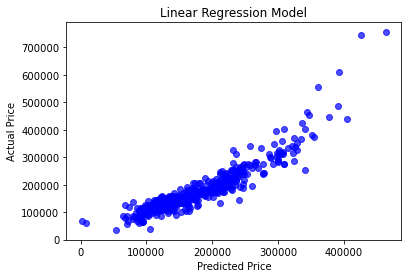

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, random_state=42, test_size=.33)

from sklearn import linear_model
lr = linear_model.LinearRegression()

model = lr.fit(X_train, y_train)

print ("R^2 is: \n", model.score(X_test, y_test))

predictions = model.predict(X_test)

from sklearn.metrics import mean_squared_error
print ('RMSE is: \n', mean_squared_error(y_test, predictions))

actual_values = y_test
plt.scatter(predictions, actual_values, alpha=.7,
            color='b') #alpha helps to show overlapping data
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Linear Regression Model')
plt.show()

In [39]:
y=final_df['SalePrice']
X=final_df.drop(['SalePrice'],axis=1)

R^2 is: 
 0.8295442534842865
RMSE is: 
 1251382344.8338454


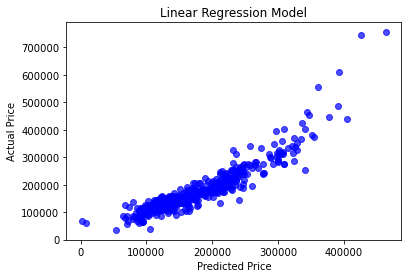

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=.33)

from sklearn import linear_model
lr = linear_model.LinearRegression()

model = lr.fit(X_train, y_train)

print ("R^2 is: \n", model.score(X_test, y_test))

predictions = model.predict(X_test)

from sklearn.metrics import mean_squared_error
print ('RMSE is: \n', mean_squared_error(y_test, predictions))

actual_values = y_test
plt.scatter(predictions, actual_values, alpha=.7,
            color='b') #alpha helps to show overlapping data
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Linear Regression Model')
plt.show()